### DATA  CHECK FROM AUTHOR'S PROVIDED IDs

In [ ]:
!pip3 install twython

In [ ]:
from twython import Twython, TwythonError

In [ ]:
CONSUMER_KEY = "y22f6q56jbtpEVFdkc0Lvqrvp"
CONSUMER_SECRET = "vKjPNw0NES54dGWGfWTJggdaHgAO7jsGTnA8e0VH6n8UMOJPq2"
OAUTH_TOKEN = "1258036907902070784-7FrXOpwS9yEDF1rD0ltBfHPLK275aj"
OAUTH_TOKEN_SECRET = "x1kUlgMQR8oc0TCiycV5oSCEIsftKscPp6S0oj0Htol9N"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
tweet = twitter.show_status(id=741818308694056960)
print(tweet['text'])

9 BEST THIGH EXERCISES: Our favorite fitness ... - #bikinibody #beachbody #diet #weightloss https://t.co/XVR7Rtvy5D https://t.co/owHvebmRy9


### DATA EXTRACTION

In [ ]:
# Pip install Tweepy if you don't already have the package
!pip install tweepy

# Imports
import tweepy
import pandas as pd
import time

In [ ]:
consumer_key = "K4w9BB9pScIfgbLE5gshtnR4f"
consumer_secret = "A7935VoQdV19N037eGvo9763QkJ9tIhFC6u8wRuV0zKCYISJOk"
access_token = "701292431178911745-csarXdETe0CIUdrqxzl6aGeWeKup3RP"
access_token_secret = "Z7qZ7sSECfPuNkECE7TtHHQCVSI06GkpW9MTbzM03ugjV"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
tweets = []

def text_query_to_csv(text_query,count):
    try:
        # Creation of query method using parameters
        tweets = tweepy.Cursor(api.search,q=text_query, since = "2021-05-13", until = "2021-05-14", lang = 'en').items(count)

        # Pulling information from tweets iterable object
        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]

        # Creation of dataframe from tweets list
        # Add or remove columns as you remove tweet information
        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Text'])

        # Converting dataframe to CSV 
        tweets_df.to_csv('{}-tweets.csv'.format(text_query), sep=',', index = False)

    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [ ]:
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
#text_query = ('diabetes OR #diabetes')
text_query = ('diet OR #diet OR dieting')
#text_query = ('exercise OR #exercise OR exercising')
#text_query = ('obesity OR #obesity OR fat')
count = 8000

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

### DDEO

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 15.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 238kB/s 
     |████████████████████████████████| 9.9MB 39.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=64110a9edfc1bcfd7fb66ccc1a20dbce5c32d74e3cfb9ca4fc2fdca4af05c02b
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from matplotlib import pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read dataset
# we will be using trained dataset to understand how people are reacting
data = pd.read_csv('/content/drive/MyDrive/wcs/data.csv', encoding='utf-8')

In [ ]:
#basic stats
data.describe()

,Datetime,Tweet Id,Text
count,104815,104806,104806
unique,60033,82607,57286
top,Datetime,1.39292E+18,RT @NigeriaStories: Today we remember Dora Aku...
freq,17,560,2259


In [ ]:
### max tweet length
df = pd.DataFrame(data, columns=['Text'])
print(df.Text.map(lambda x: len(x)).max())

164


In [ ]:
df = data.dropna(subset=['Text'])

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p
df['clean_text'] = df['Text'].apply(lambda text: p.clean(str(text)))
df['clean_text'] = df['clean_text'].apply(lambda text: text.lower())
def remove_contractions(text):
    text = re.sub(r'’', '\'', text)
    
    text = re.sub(r'won\'t', 'will not', text)
    text = re.sub(r'can\'t', 'can not', text)
    
    text = re.sub(r'\'s', ' is', text)
    text = re.sub(r'\'m', ' am', text)
    text = re.sub(r'\'re', ' are', text)
    text = re.sub(r'\'ve', ' have', text)
    text = re.sub(r'\'ll', ' will', text)
    text = re.sub(r'\'d', ' would', text)
    text = re.sub(r'\'t', ' not', text)
    text = re.sub(r'n\'t', ' not', text)
    
    return text

df['clean_text'] = df['clean_text'].apply(remove_contractions)
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')
# Remove whitespaces and empty tweets.
df['clean_text'] = df['clean_text'].apply(lambda text: str(text).strip())
# Remove empty texts.
df = df.drop(df[df['clean_text'] == ''].index)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

####Tokenize words and Clean-up text

Gensim’s simple_preprocess() is great for this. Additionally I have set deacc=True to remove the punctuations.

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_text = df['clean_text']
data_words = list(sent_to_words(data_text))

print(data_words[:1])

[['lose', 'weight', 'fast', 'without', 'exercise']]


In [ ]:
#Remove Stopwords, and Lemmatize
# Define functions for stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(data_lemmatized[:1])

[['fast', 'exercise']]


### Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [ ]:
id2word[0]

'exercise'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('exercise', 1), ('fast', 1)]]

In [ ]:
## install Java
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
## install mallet
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-05-22 06:14:16--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.53MB/s    in 1.6s    

2021-05-22 06:14:18 (9.53 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [ ]:
#Building LDA Mallet Model
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(11,
  [('back', 0.05221048312647451),
   ('bad', 0.05210790850343625),
   ('exercise', 0.026464252743871167),
   ('point', 0.023387014052723355),
   ('question', 0.015078469586624269),
   ('place', 0.014463021848394706),
   ('hold', 0.012924402502820802),
   ('issue', 0.012719253256744282),
   ('country', 0.011488357780285157),
   ('size', 0.011283208534208637)]),
 (12,
  [('exercise', 0.24072379790586562),
   ('run', 0.02968384670123005),
   ('move', 0.01738334858188472),
   ('turn', 0.015350208396868964),
   ('morning', 0.014028667276608722),
   ('happen', 0.013825353258107147),
   ('understand', 0.013113754193351632),
   ('power', 0.012198841110094541),
   ('write', 0.011588899054589813),
   ('age', 0.011283928026837451)]),
 (7,
  [('plan', 0.030745658835546474),
   ('play', 0.026659856996935648),
   ('support', 0.02553626149131767),
   ('week', 0.024616956077630234),
   ('fast', 0.023084780388151174),
   ('sleep', 0.02247191011235955),
   ('burn', 0.01807967313585291),
   ('calor

In [ ]:
#How to find the optimal number of topics for LDA?
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=300, step=5)

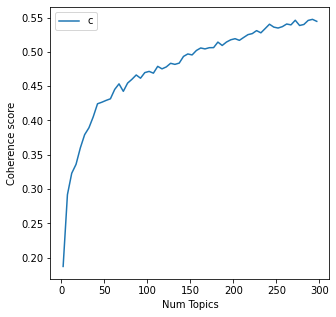

In [ ]:
# Show graph
limit=300; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1872
Num Topics = 7  has Coherence Value of 0.2918
Num Topics = 12  has Coherence Value of 0.323
Num Topics = 17  has Coherence Value of 0.336
Num Topics = 22  has Coherence Value of 0.36
Num Topics = 27  has Coherence Value of 0.3792
Num Topics = 32  has Coherence Value of 0.3893
Num Topics = 37  has Coherence Value of 0.4053
Num Topics = 42  has Coherence Value of 0.4243
Num Topics = 47  has Coherence Value of 0.4265
Num Topics = 52  has Coherence Value of 0.4292
Num Topics = 57  has Coherence Value of 0.4315
Num Topics = 62  has Coherence Value of 0.4452
Num Topics = 67  has Coherence Value of 0.4533
Num Topics = 72  has Coherence Value of 0.4424
Num Topics = 77  has Coherence Value of 0.4544
Num Topics = 82  has Coherence Value of 0.4599
Num Topics = 87  has Coherence Value of 0.4662
Num Topics = 92  has Coherence Value of 0.4616
Num Topics = 97  has Coherence Value of 0.4697
Num Topics = 102  has Coherence Value of 0.4715
Num Topics = 107  

In [ ]:
# Select the model and print the sub-topics
optimal_model = model_list[57]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.085*"tell" + 0.076*"much" + 0.061*"find" + 0.039*"life" + 0.022*"pretty" '
  '+ 0.020*"weird" + 0.018*"head" + 0.013*"count" + 0.012*"night" + '
  '0.012*"result"'),
 (1,
  '0.098*"day" + 0.098*"think" + 0.062*"never" + 0.053*"may" + 0.025*"low" + '
  '0.023*"actually" + 0.021*"less" + 0.020*"lot" + 0.018*"skinny" + '
  '0.016*"stick"'),
 (2,
  '0.065*"way" + 0.043*"learn" + 0.030*"mean" + 0.030*"obesity" + 0.027*"run" '
  '+ 0.025*"stay" + 0.025*"will" + 0.021*"taste" + 0.018*"thank" + '
  '0.018*"tired"'),
 (3,
  '0.060*"healthy" + 0.051*"well" + 0.032*"maybe" + 0.026*"pre" + 0.025*"play" '
  '+ 0.014*"laugh" + 0.013*"tip" + 0.013*"other" + 0.013*"believe" + '
  '0.013*"else"'),
 (4,
  '0.120*"make" + 0.112*"say" + 0.061*"today" + 0.044*"still" + 0.036*"lose" + '
  '0.023*"die" + 0.021*"ever" + 0.019*"enough" + 0.015*"end" + 0.014*"do"'),
 (5,
  '0.092*"food" + 0.086*"body" + 0.067*"even" + 0.044*"shit" + 0.037*"year" + '
  '0.029*"month" + 0.016*"dieting" + 0.015*"sleep" +